# 毕业论文`GRAD`
## `MCIP`气象场分析

---
*@author: Evan*\
*@date: 2024-03-29*

In [1]:
import numpy as np
import os

import sys
sys.path.append('../../../src/')
from namelist import *
from mask import polygon_to_mask, average_data
from spatial import plot_PRD_map, plot_PRD_diff

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
var = 'PBLH'

years = np.array([2022,2021,2019]) # 此处年份倒置是为了方便后续创建dataarray时取用时间维度

summer_files = [os.path.join(processed_dir, f"Jul_{year}/Jul_{year}_mcip.nc") for year in years]
autumn_files = [os.path.join(processed_dir, f"Sep_{year}/Sep_{year}_mcip.nc") for year in years]

avg_summer    = average_data(summer_files, var)
avg_autumn    = average_data(autumn_files, var)
avg_summer_uw = average_data(summer_files, 'uwind')
avg_autumn_uw = average_data(autumn_files, 'uwind')
avg_summer_vw = average_data(summer_files, 'vwind')
avg_autumn_vw = average_data(autumn_files, 'vwind')

In [3]:
mean_summer = avg_summer.mean(dim='time')
mean_autumn = avg_autumn.mean(dim='time')

uwind_summer = avg_summer_uw.mean(dim='time')
uwind_autumn = avg_autumn_uw.mean(dim='time')
vwind_summer = avg_summer_vw.mean(dim='time')
vwind_autumn = avg_autumn_vw.mean(dim='time')

提取白天均值

In [10]:
daytime_summer = avg_summer.sel(time=(avg_summer['time.hour'] >= 8) & (avg_summer['time.hour'] <= 17))
mean_summer = daytime_summer.mean(dim='time')
daytime_autumn = avg_autumn.sel(time=(avg_autumn['time.hour'] >= 8) & (avg_autumn['time.hour'] <= 17))
mean_autumn = daytime_autumn.mean(dim='time')

In [15]:
cmin=500
cmax=1500
cmstep=10
cbstep=200

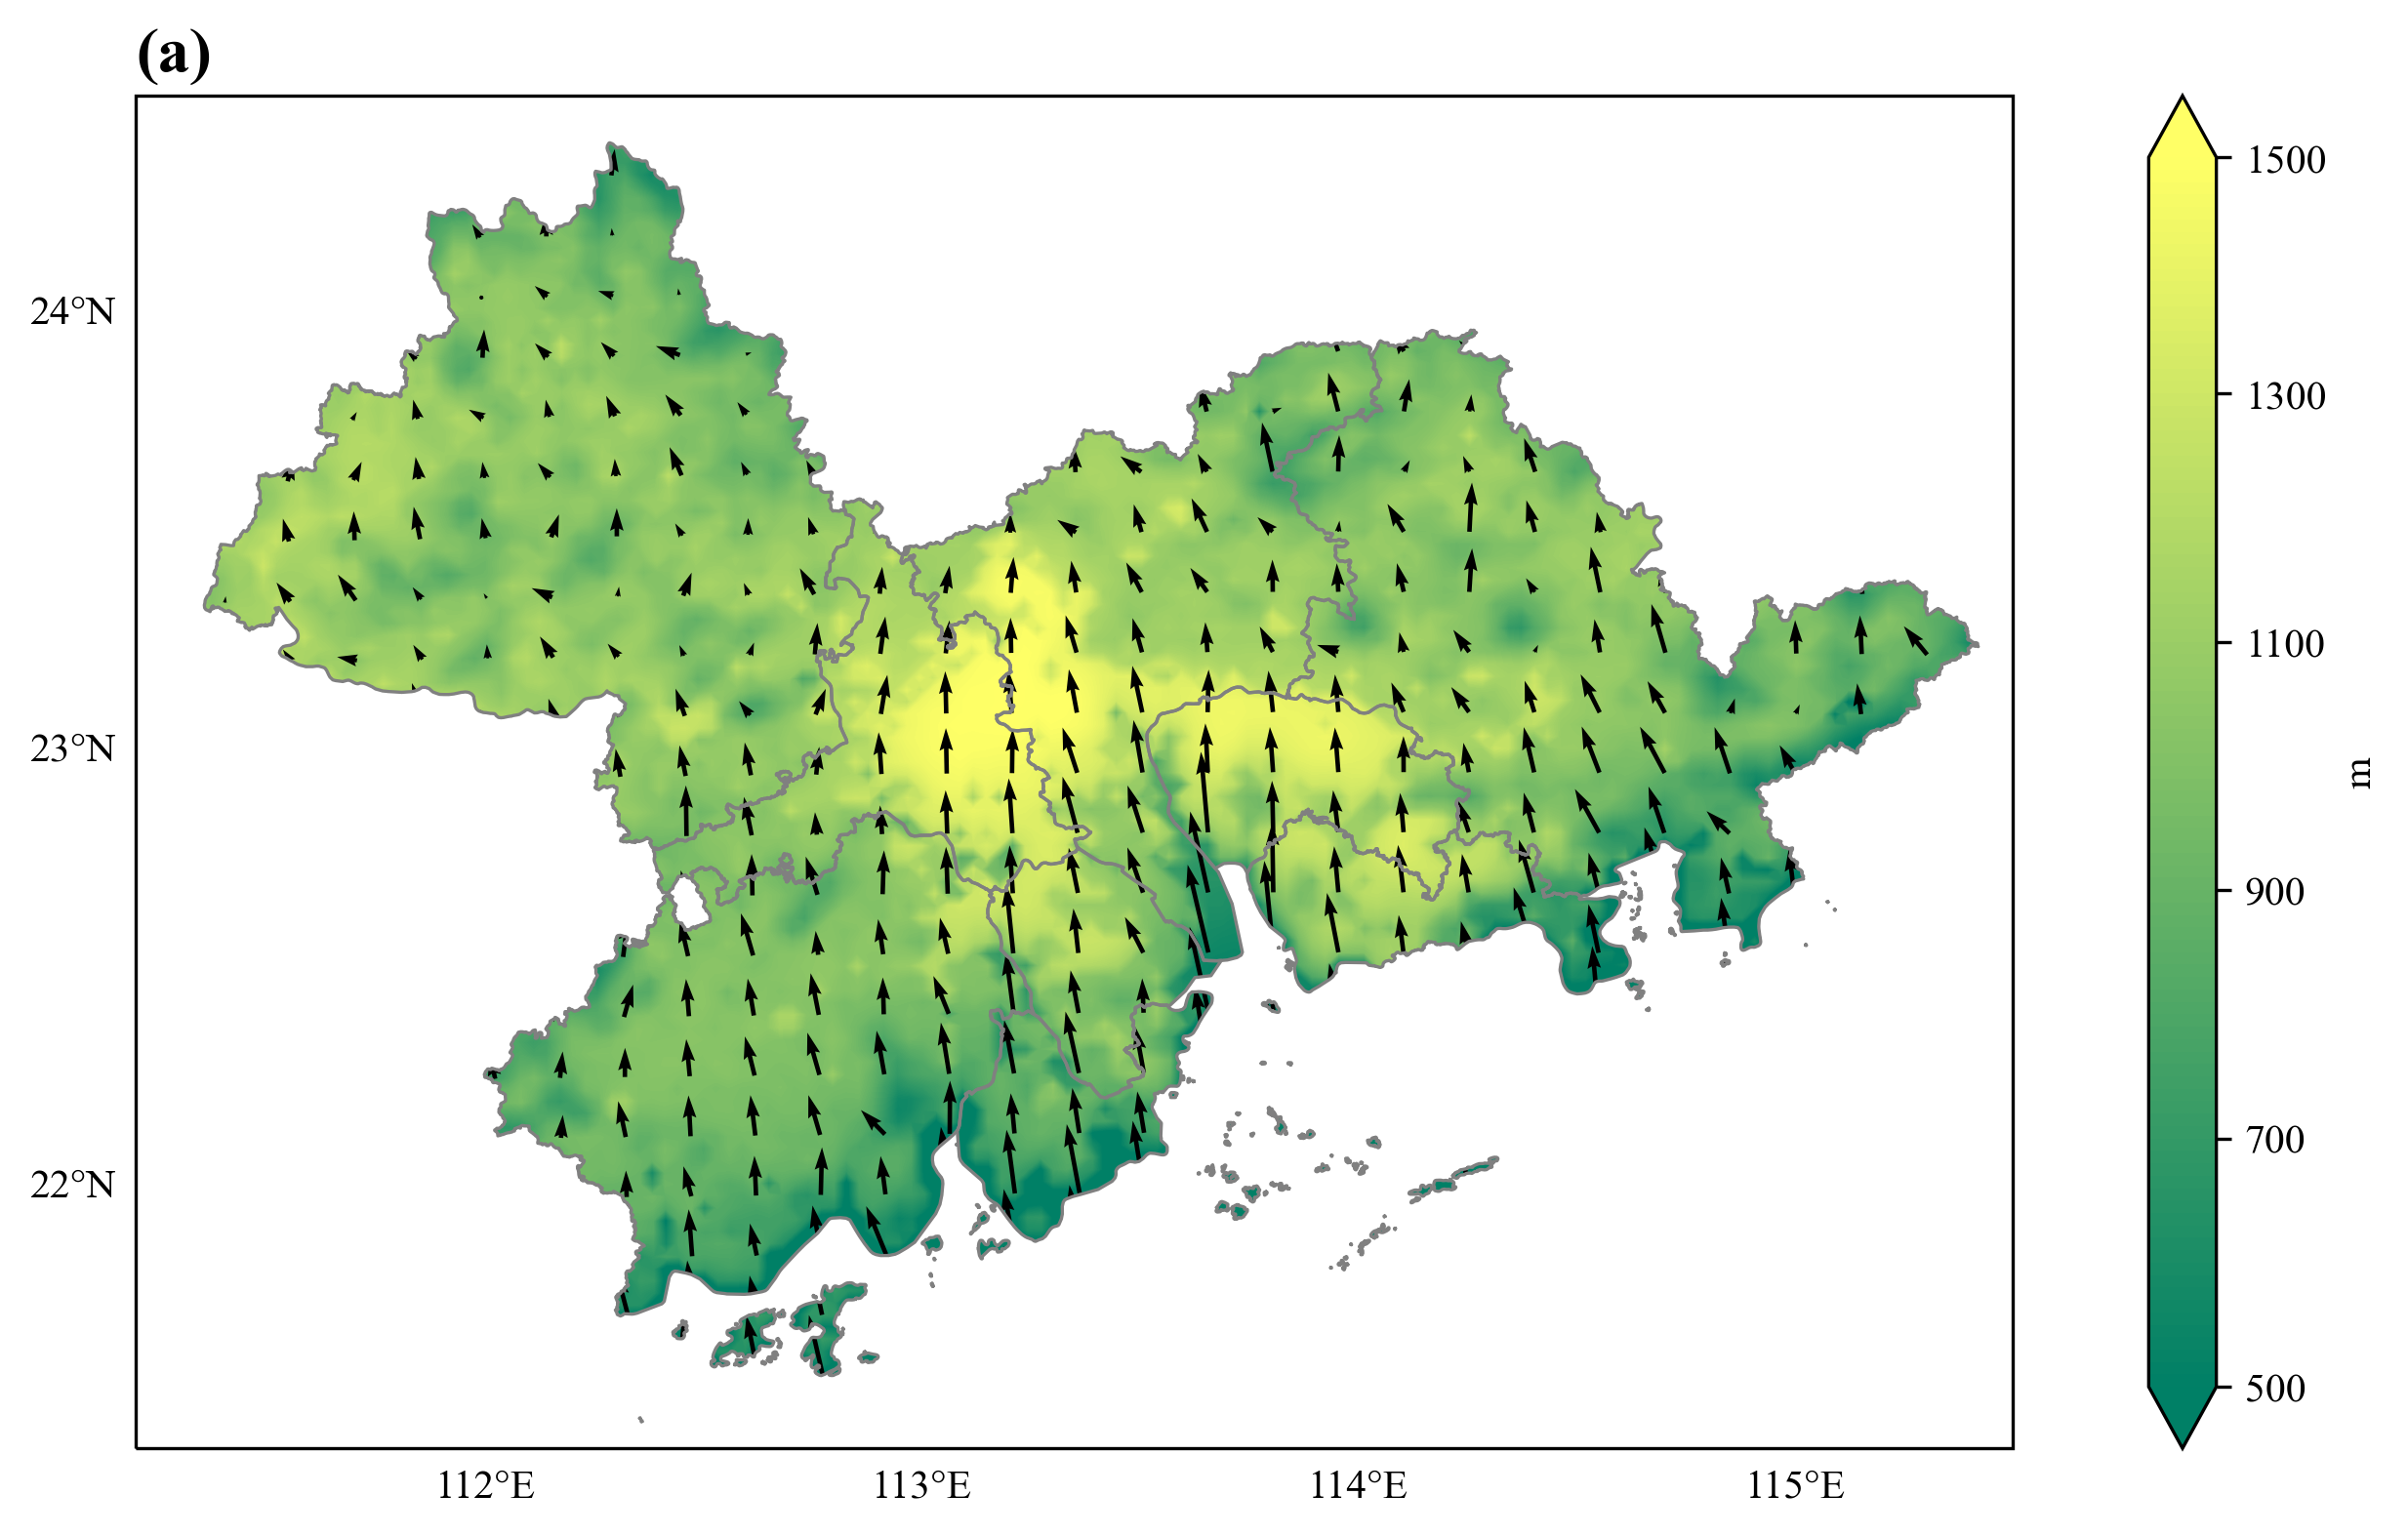

In [16]:
plot_PRD_map(avg_summer, cmin, cmax, cmstep, cbstep,
             mean_summer, uwind_summer, vwind_summer,
             ngrid=5, scale=100, headwidth=3,
             mapcolor='summer',title='(a)', colorbar_label='m')

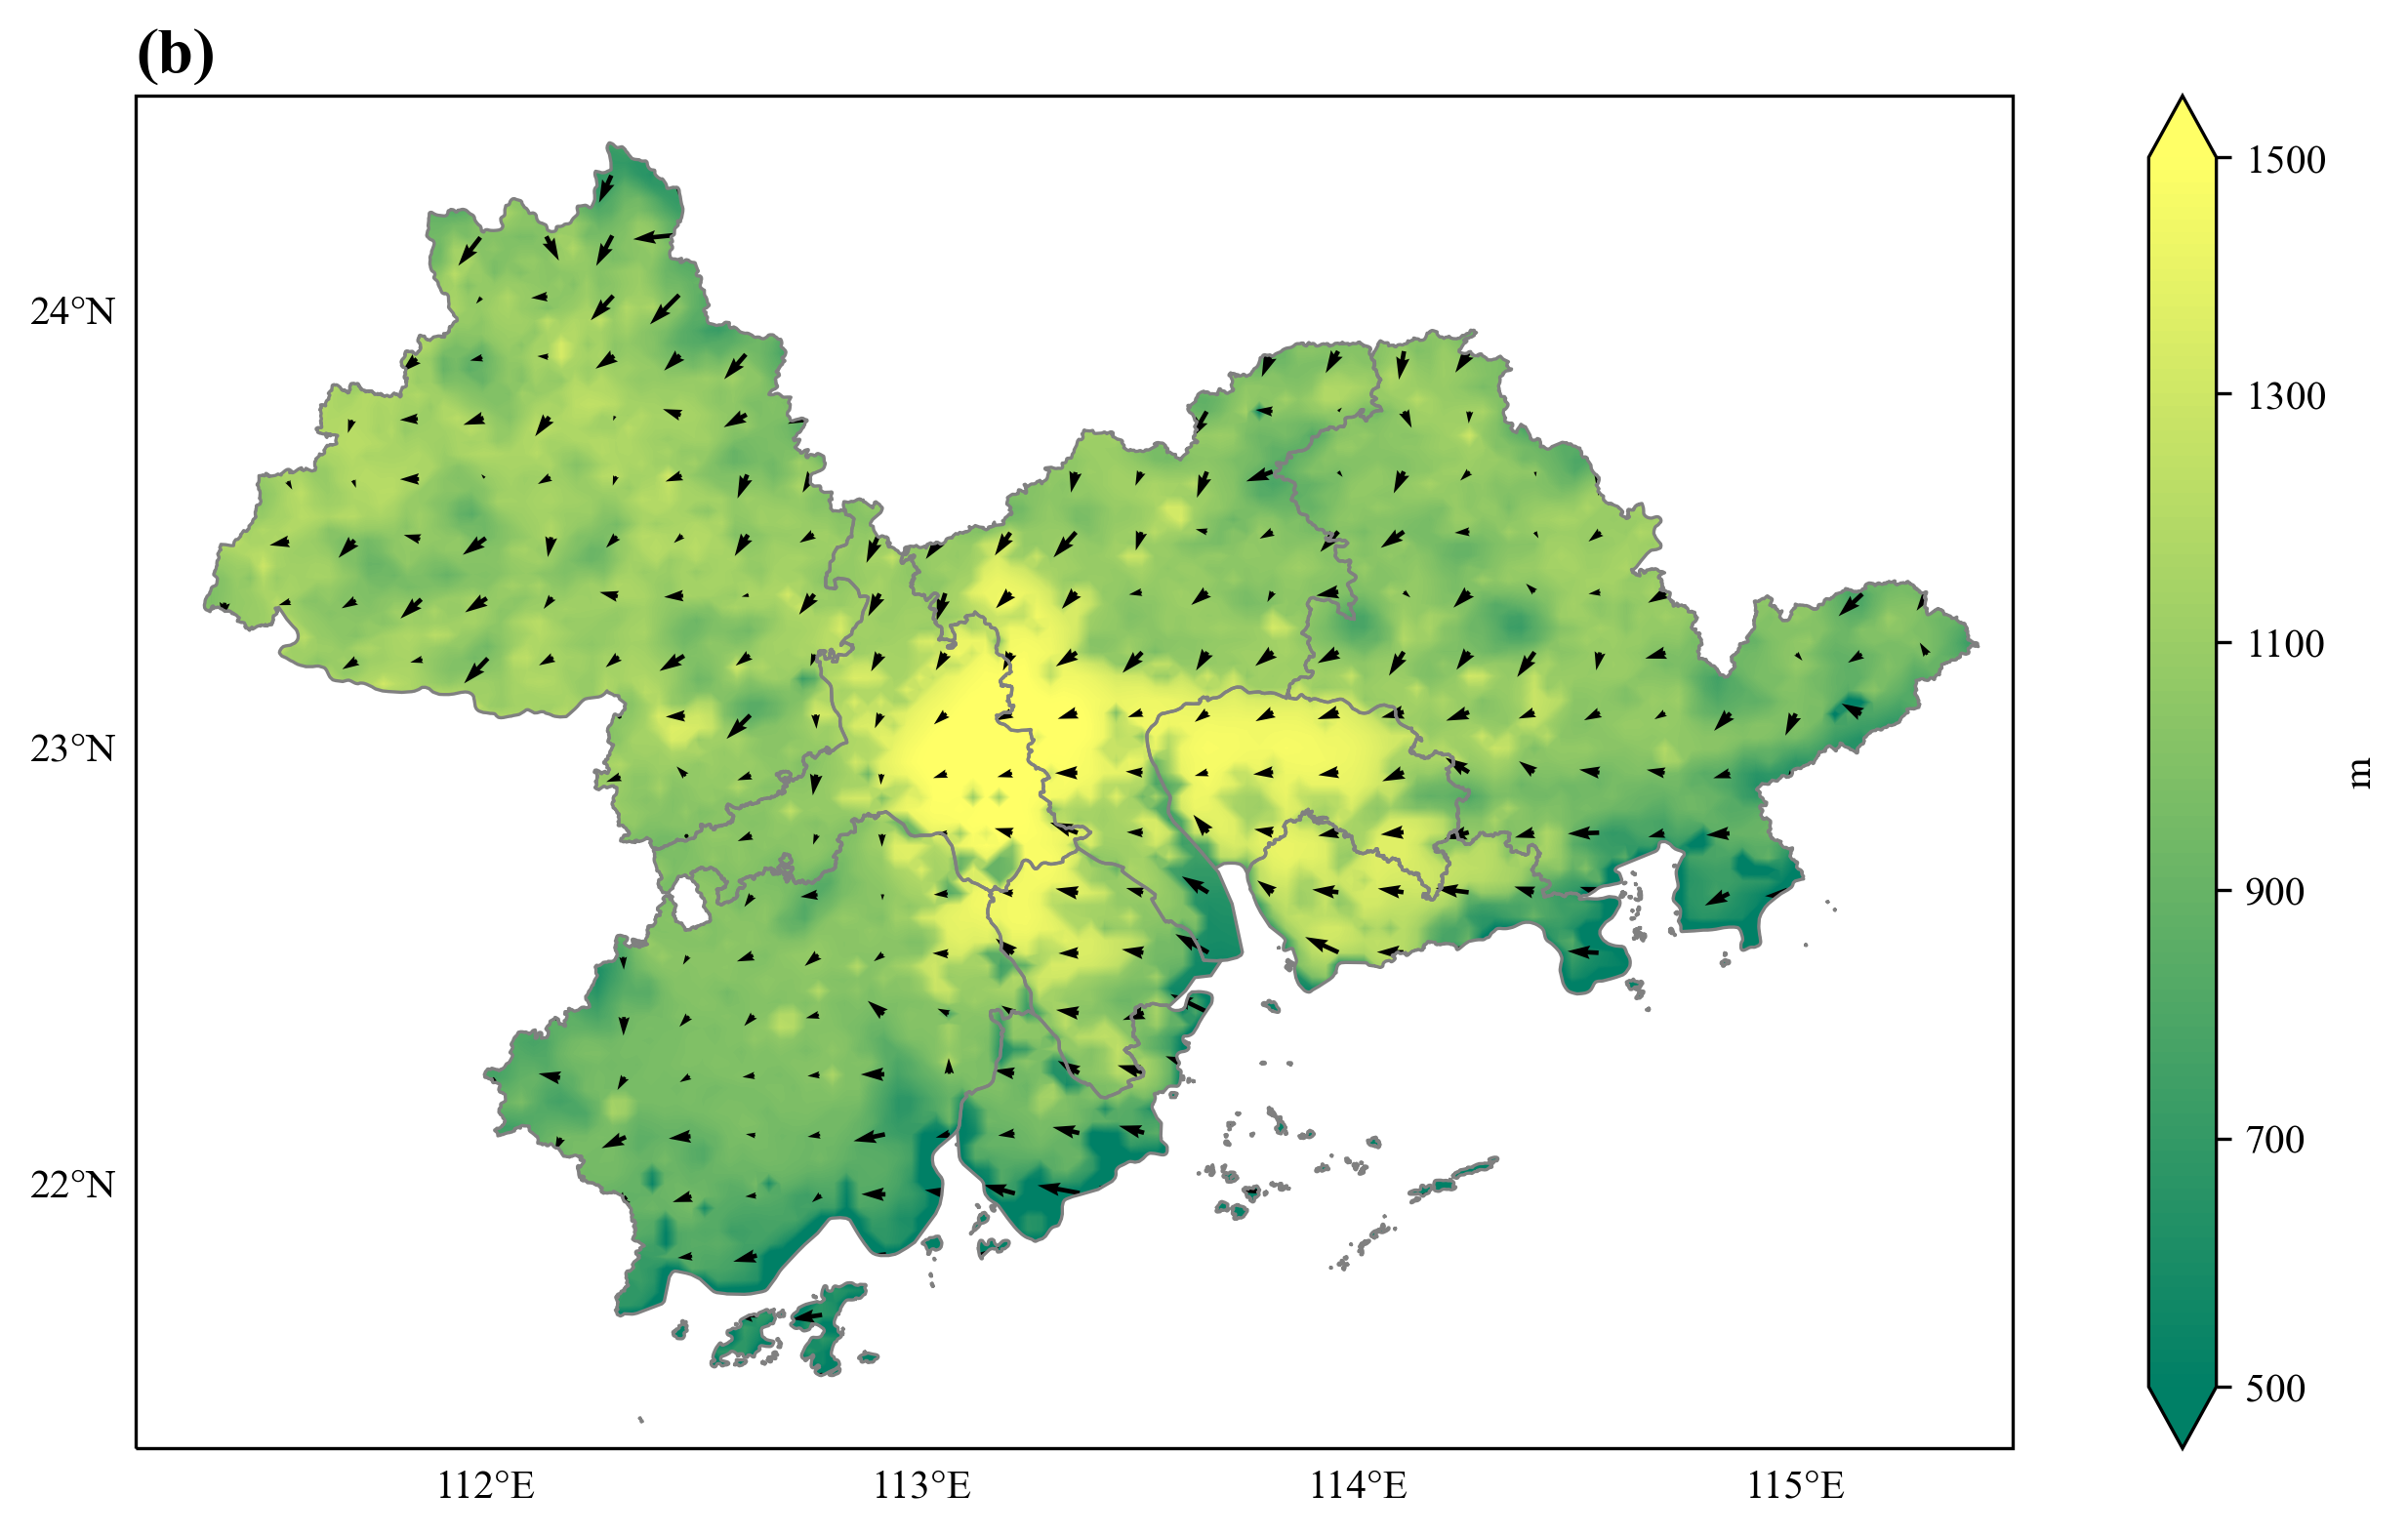

In [17]:
plot_PRD_map(avg_summer, cmin, cmax, cmstep, cbstep,
             mean_autumn, uwind_autumn, vwind_autumn,
             ngrid=5, scale=100, headwidth=3,
             mapcolor='summer',title='(b)', colorbar_label='m')

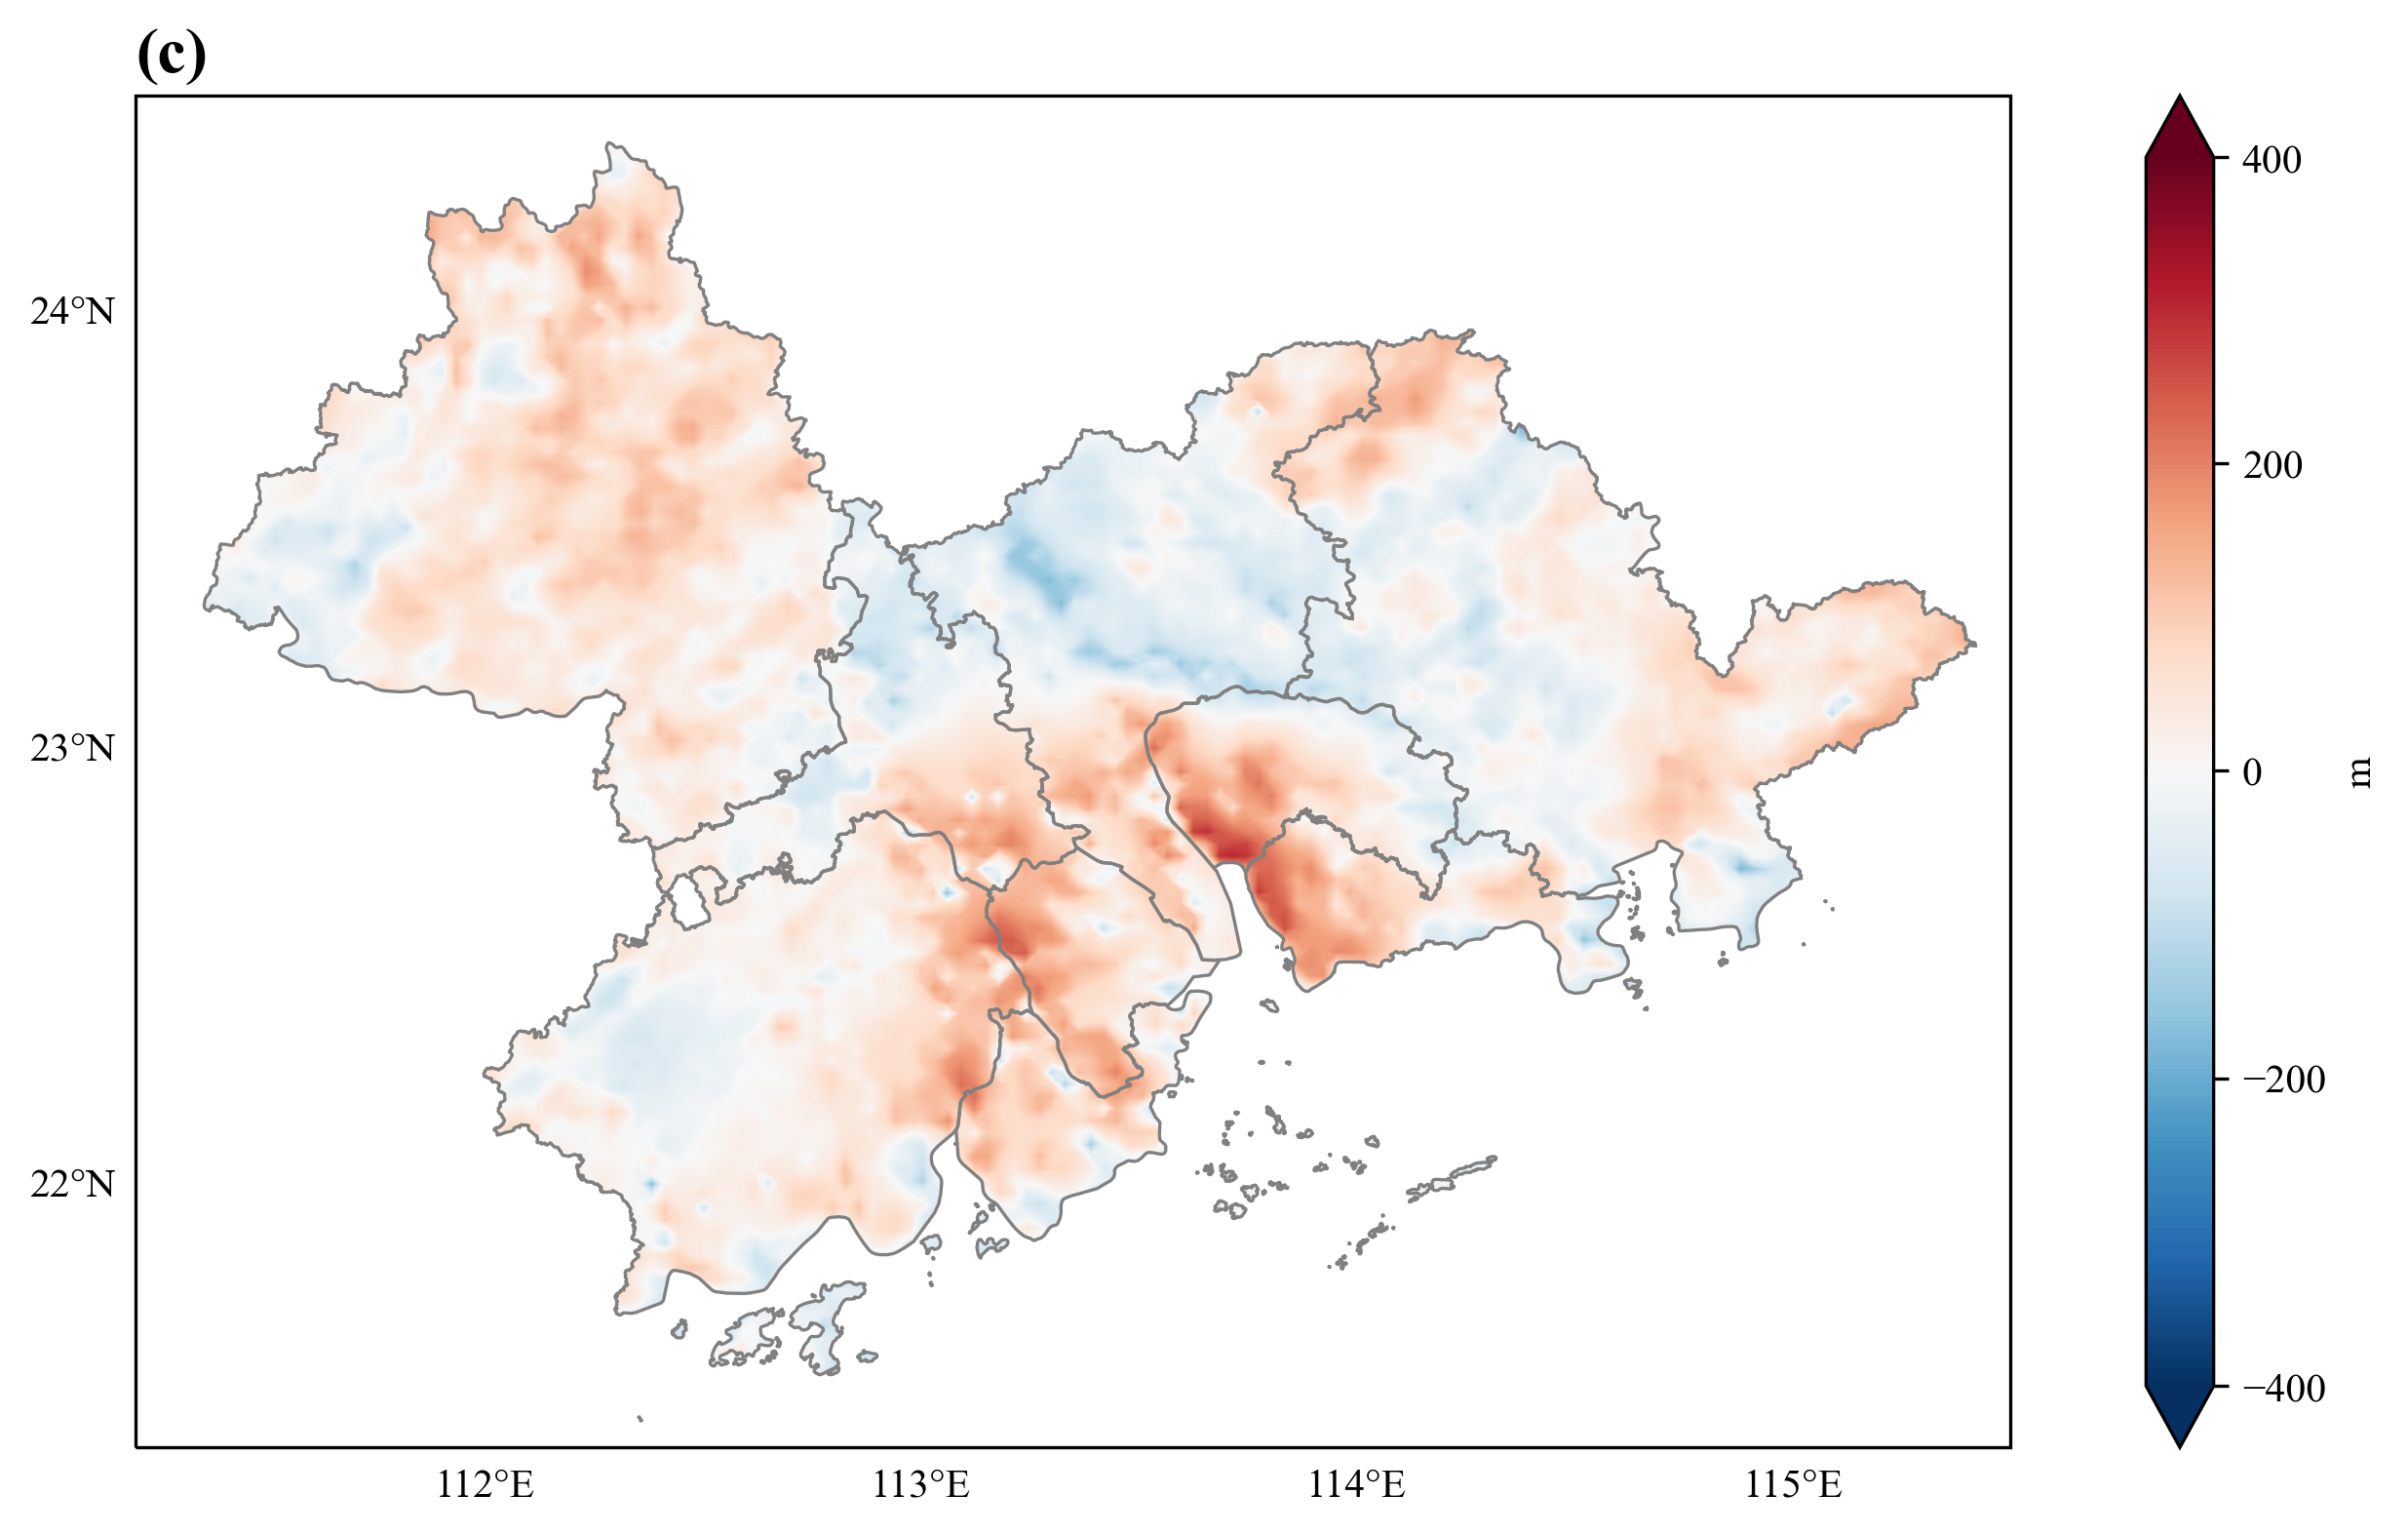

In [18]:
cmin = -400
cmax = 400
cmstep = 1
cbstep = 200

plot_PRD_diff(avg_summer, cmin, cmax, cmstep, cbstep,
              mean_summer, mean_autumn,
              title='(c)', colorbar_label='m')